In [17]:
import os
import skimage.io as io
import torchvision.transforms as trans
from torchvision.transforms import v2
from embed_time.transforms import CustomToTensor, SelectRandomTimepoint
from embed_time.dataloader import LiveTLSDataset

data_location = "/mnt/efs/dlmbl/G-et/data/live-TLS"

folder_imgs = data_location +"/"+'Control_Dataset_4TP_Normalized'
metadata = data_location + "/" +'Control_Dataset_4TP_Ground_Truth'

loading_transforms = trans.Compose([
    CustomToTensor(),
    SelectRandomTimepoint(0),
    v2.RandomAffine(
        degrees=90,
        translate=[0.1,0.1],
    ),
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
    v2.GaussianNoise(0,0.05)
])

dataset_w_t = LiveTLSDataset(
    metadata,
    folder_imgs,
    metadata_columns=["Run","Plate","ID"],
    return_metadata=True,
    transform = loading_transforms,
)

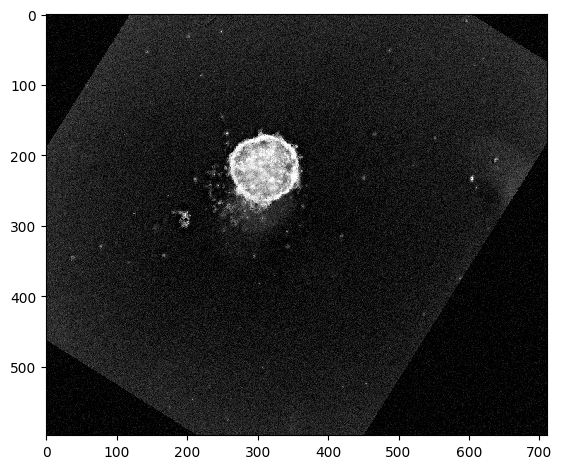

In [21]:
tensor, l, m = dataset_w_t[0]
tensor.shape

io.imshow(tensor.numpy()[0])